In [1]:
import sys
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')

# from src.ablate_heads import Ablate, AblateMultiLen, OVCircuit
from src.experiment import AblateMultiLen, OVCircuit
from src.dataset import TlensDataset
# from src.dataset import MyDataset
from src.model import WrapHookedTransformer

from src.myplot import plot_heatmaps, barplot_head
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import einops

torch.set_grad_enabled(False)
%load_ext autoreload
%autoreload 2

In [3]:
model = WrapHookedTransformer.from_pretrained("gpt2", device="cuda", refactor_factored_attn_matrices=True)
dataset = TlensDataset("../data/full_data_sampled_gpt2.json", model, slice=500)

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2 into HookedTransformer
Dataset loaded from ../data/full_data_sampled_gpt2.json
Number of samples: 500


In [ ]:
ablate_multi = AblateMultiLen(dataset, model, 40)
examples_mem, examples_cp = ablate_multi.ablate_multi_len(ablate_target="head", return_type="diff")

In [4]:
diff = torch.load("../results/gpt2_examples_diff.pt")

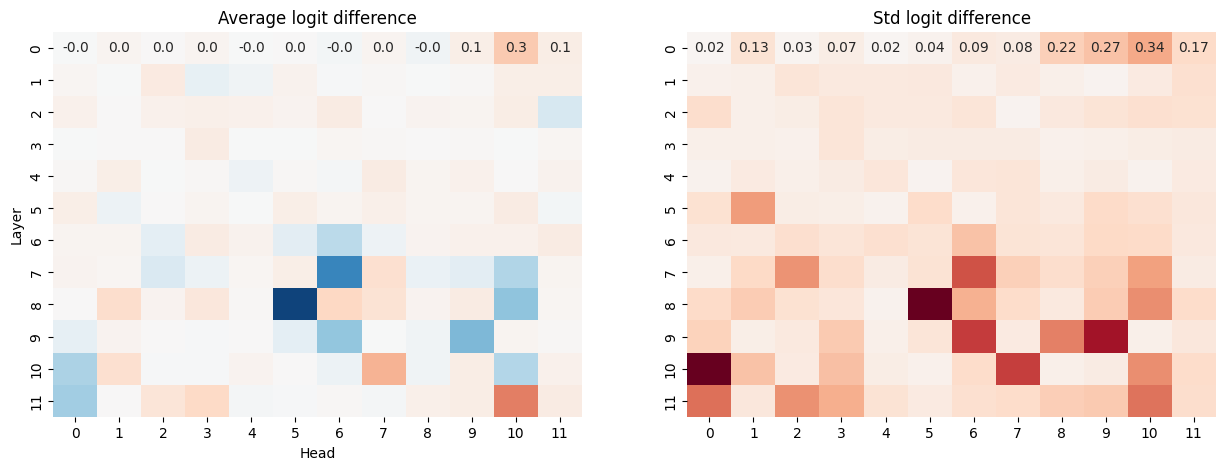

In [5]:
plot_heatmaps(diff.mean(-1), diff.std(-1), title="ciao", interval=1.2)

## Attention pattern

In [6]:
from src.ablate_heads import AttentionPattern
pattern = AttentionPattern(model,dataset, 40)

In [14]:
pat = pattern.attention_pattern_all_len()

Attention pattern at len 49: 100%|██████████| 1/1 [00:00<00:00, 70.60it/s]


In [17]:
pat.shape.mean(0)

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_52568/3816652812.py:1 in <module>                                          │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_52568/3816652812.py'                 │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'torch.Size' object has no attribute 'mean'

In [24]:
import circuitsvis as cv
tokens = ["--", "subject_1_1", "subject_1_2", "subject_1_3", "--", "pre", "definition", "post_definition",  "subject_2_1", "subject_2_2", "subject_2_3", "--","last"]
cv.attention.attention_patterns(tokens=tokens, attention=pat.mean(0)[9]) 

In [21]:
len(tokens)

14

In [35]:
dims = sorted(dims)

In [37]:
tuple(dims)

(-2, -1)

In [ ]:
torch.zeros(())